# 1. Frame the problem
Using the customer description, Define the problem your trying to solve in your own words (remember this is not technial but must be specific so the customer understands the project

Assignment: Determine whether or not an email is spam or ham based on previous emails. 

# 2. Get the Data 
Define how you recieved the data (provided, gathered..)

The emails were provided to us in a large zip folder and were labeled with either spam or ham.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
import glob

In [3]:
data_path = "data"

df = pd.DataFrame(columns=["name", "text"])

full_paths = glob.glob(os.path.join(data_path, "*"))

In [4]:
all_names = []
all_messages = []
for file_path in full_paths:
    try:
        with open(file_path, "r") as f:
            txt = f.read()
        all_names.append(os.path.basename(file_path))
        all_messages.append(txt)
    except Exception as e:
        print(f"Error reading {file_path}: {e}")

In [5]:
df["text"] = all_messages
df["name"] = all_names

In [6]:
df.head()

,name,text
0,6-14msg3.txt,Subject: wkshp : * early * - e ( = ) uralic in...
1,6-110msg1.txt,Subject: job announcement - academium sinica\n...
2,9-63msg1.txt,Subject: knowledge language bibliography\n\nas...
3,spmsga95.txt,Subject: service update\n\ndue significant rap...
4,6-97msg1.txt,Subject: job announcement\n\njob announcement ...


In [7]:
spam_df = df[df['name'].str.startswith('spm')]
spam_df = spam_df.copy()
ham_df = df[~df.apply(tuple,1).isin(spam_df.apply(tuple,1))]
ham_df = ham_df.copy()

In [8]:
print(spam_df.head())
print(ham_df.head())

             name                                               text
3    spmsga95.txt  Subject: service update\n\ndue significant rap...
6    spmsgb16.txt  Subject: season greeting santa !\n\nsanta onli...
9   spmsga161.txt  Subject: futuresignal\n\nmessage send complian...
10  spmsgc135.txt  Subject: did work ? - calsvxtn\n\nhello thank ...
13  spmsga130.txt  Subject: zero down internet opportunity !\n\n$...
            name                                               text
0   6-14msg3.txt  Subject: wkshp : * early * - e ( = ) uralic in...
1  6-110msg1.txt  Subject: job announcement - academium sinica\n...
2   9-63msg1.txt  Subject: knowledge language bibliography\n\nas...
4   6-97msg1.txt  Subject: job announcement\n\njob announcement ...
5  8-887msg1.txt  Subject: hypermedium den geisteswissenschaften...


# 3. Explore the Data
Gain insights into the data you have from step 2, making sure to identify any bias

Some things I want to look at:
- tone indicators
- capitalization patterns (spam will probably have more capitals to try to convince u)
- word frequency
- sender address (no reply or smth like that is sketchy while edu is good)

In [9]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [10]:
from wordcloud import WordCloud
import re
from wordcloud import STOPWORDS

spam_text = ' '.join(spam_df['text'].astype(str).tolist())

spam_text = re.sub(r'[^A-Za-z\s]', '', spam_text)

spam_text = spam_text.lower()

stopwords = set(STOPWORDS)
spam_text = ' '.join(word for word in spam_text.split() if word not in stopwords and len(word) > 2)

sp_cleaned_text_df = spam_df["text"].apply(lambda x: re.sub(r'[^A-Za-z\s]', '',x).lower())

spam_df["clean"] = sp_cleaned_text_df.apply(
                        lambda x: [word for word in x.split() if word not in stopwords]
                    )

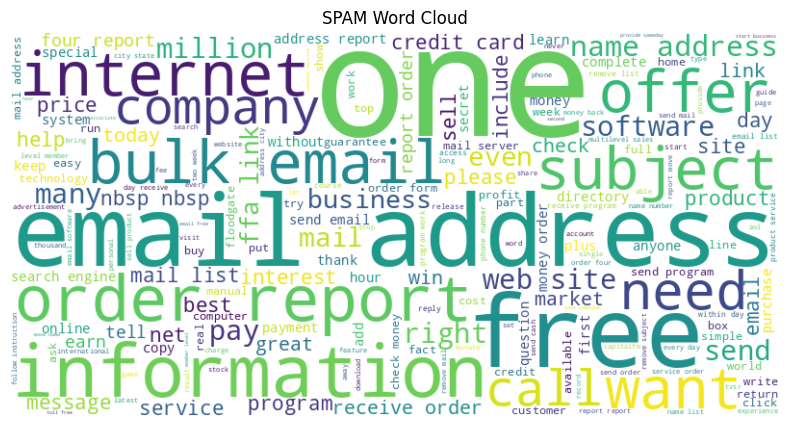

In [11]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title("SPAM Word Cloud")
plt.show()

In [12]:
import collections

spam_lst = spam_text.split(" ")
spam_counter = collections.Counter(spam_lst)
print(spam_counter.most_common(10))

total = len(spam_lst)
for item, count in spam_counter.most_common(10):
    percentage = (count / total) * 100
    print(f"{item}: {percentage:.2f}%")

[('email', 1518), ('order', 1284), ('report', 1264), ('mail', 1044), ('address', 1037), ('send', 945), ('program', 933), ('free', 819), ('list', 799), ('receive', 796)]
email: 1.42%
order: 1.20%
report: 1.18%
mail: 0.97%
address: 0.97%
send: 0.88%
program: 0.87%
free: 0.76%
list: 0.75%
receive: 0.74%


In [13]:
ham_text = ' '.join(ham_df['text'].astype(str).tolist())

ham_text = re.sub(r'[^A-Za-z\s]', '', ham_text)

ham_text = ham_text.lower()

ham_text = ' '.join(word for word in ham_text.split() if word not in stopwords and len(word) > 2)

h_cleaned_text_df = ham_df["text"].apply(lambda x: re.sub(r'[^A-Za-z\s]', '',x).lower())

ham_df["clean"] = h_cleaned_text_df.apply(
                        lambda x: [word for word in x.split() if word not in stopwords]
                    )

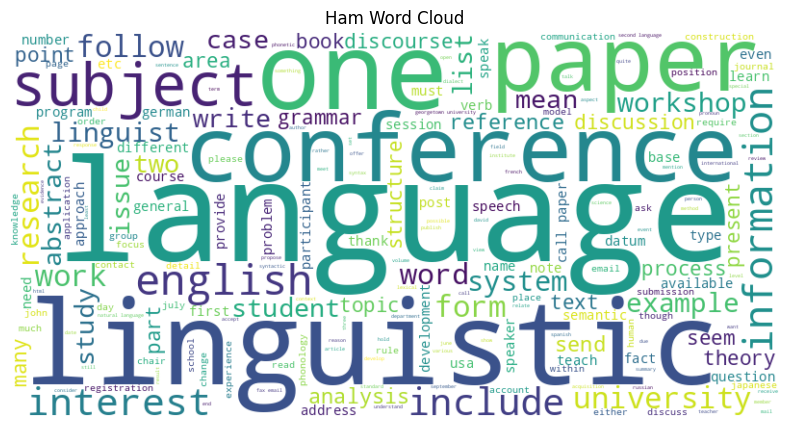

In [14]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title("Ham Word Cloud")
plt.show()

In [15]:
ham_lst = ham_text.split(" ")
ham_counter = collections.Counter(ham_lst)
print(ham_counter.most_common(10))

total = len(ham_lst)
for item, count in ham_counter.most_common(10):
    percentage = (count / total) * 100
    print(f"{item}: {percentage:.2f}%")

[('language', 1578), ('university', 1142), ('linguistic', 677), ('subject', 610), ('conference', 568), ('one', 457), ('edu', 456), ('information', 453), ('english', 422), ('email', 362)]
language: 1.35%
university: 0.98%
linguistic: 0.58%
subject: 0.52%
conference: 0.49%
one: 0.39%
edu: 0.39%
information: 0.39%
english: 0.36%
email: 0.31%


The most common words in the ham are clearly academic terms, which suggests this person is a professor.

In [16]:
spam_df['text_lengths'] = spam_df['text'].apply(
    lambda x: [len(part) for i, part in enumerate(x.split('\n')) if i not in (1, 3)]
)

print(spam_df.head())
sp_lengths_df = pd.DataFrame(spam_df['text_lengths'].tolist())
print("Median length for subject:", sp_lengths_df[0].median())
print("Median length for body text:", sp_lengths_df[1].median())
print("Median length for total:", sp_lengths_df[1].median() + sp_lengths_df[0].median())

             name                                               text  \
3    spmsga95.txt  Subject: service update\n\ndue significant rap...   
6    spmsgb16.txt  Subject: season greeting santa !\n\nsanta onli...   
9   spmsga161.txt  Subject: futuresignal\n\nmessage send complian...   
10  spmsgc135.txt  Subject: did work ? - calsvxtn\n\nhello thank ...   
13  spmsga130.txt  Subject: zero down internet opportunity !\n\n$...   

                                                clean text_lengths  
3   [subject, service, update, due, significant, r...    [23, 311]  
6   [subject, season, greeting, santa, santa, onli...    [32, 141]  
9   [subject, futuresignal, message, send, complia...   [21, 1765]  
10  [subject, work, calsvxtn, hello, thank, stop, ...    [30, 133]  
13  [subject, zero, internet, opportunity, interne...    [41, 152]  
Median length for subject: 31.0
Median length for body text: 1337.0
Median length for total: 1368.0


In [17]:
ham_df['text_lengths'] = ham_df['text'].apply(
    lambda x: [len(part) for i, part in enumerate(x.split('\n')) if i not in (1, 3)]
)

print(ham_df.head())
h_lengths_df = pd.DataFrame(ham_df['text_lengths'].tolist())
print("Median length for subject:", h_lengths_df[0].median())
print("Median length for body text:", h_lengths_df[1].median())
print("Median length for total:", h_lengths_df[1].median() + h_lengths_df[0].median())

            name                                               text  \
0   6-14msg3.txt  Subject: wkshp : * early * - e ( = ) uralic in...   
1  6-110msg1.txt  Subject: job announcement - academium sinica\n...   
2   9-63msg1.txt  Subject: knowledge language bibliography\n\nas...   
4   6-97msg1.txt  Subject: job announcement\n\njob announcement ...   
5  8-887msg1.txt  Subject: hypermedium den geisteswissenschaften...   

                                               clean text_lengths  
0  [subject, wkshp, early, e, uralic, interaction...   [55, 1917]  
1  [subject, job, announcement, academium, sinica...   [44, 1339]  
2  [subject, knowledge, language, bibliography, a...    [40, 953]  
4  [subject, job, announcement, job, announcement...   [25, 1218]  
5  [subject, hypermedium, den, geisteswissenschaf...   [46, 1136]  
Median length for subject: 35.0
Median length for body text: 1376.0
Median length for total: 1411.0


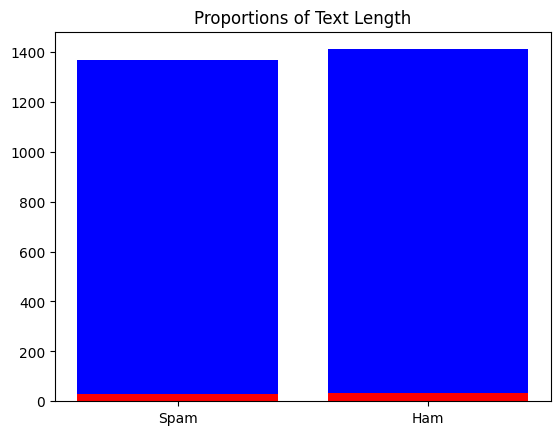

In [18]:
x = ["Spam", "Ham"]
y1 = [sp_lengths_df[0].median(), h_lengths_df[0].median()]
y2 = [sp_lengths_df[1].median(), h_lengths_df[1].median()]

plt.bar(x, y1, color='r', label="Subject Length")
plt.bar(x, y2, bottom=y1, color='b', label="Body Length")
plt.title("Proportions of Text Length")
plt.show()

There are no super significant differences between subject and body text length between the spam and ham, besides the ham being a little more in subject and less in body. Even when looking at median (resistant to any outliers), the counts are very similar. 

In [19]:
spam_df.head(10)

,name,text,clean,text_lengths
3,spmsga95.txt,Subject: service update\n\ndue significant rap...,"[subject, service, update, due, significant, r...","[23, 311]"
6,spmsgb16.txt,Subject: season greeting santa !\n\nsanta onli...,"[subject, season, greeting, santa, santa, onli...","[32, 141]"
9,spmsga161.txt,Subject: futuresignal\n\nmessage send complian...,"[subject, futuresignal, message, send, complia...","[21, 1765]"
10,spmsgc135.txt,Subject: did work ? - calsvxtn\n\nhello thank ...,"[subject, work, calsvxtn, hello, thank, stop, ...","[30, 133]"
13,spmsga130.txt,Subject: zero down internet opportunity !\n\n$...,"[subject, zero, internet, opportunity, interne...","[41, 152]"
14,spmsgc119.txt,Subject: advertise million million free ! ! ! ...,"[subject, advertise, million, million, free, k...","[54, 3393]"
15,spmsga65.txt,Subject: cable decsrambler $ 6 . 99 !\n\nreall...,"[subject, cable, decsrambler, really, cool, pr...","[37, 1509]"
18,spmsgc133.txt,Subject: sorry delay - fqtfsqvb\n\nhello thank...,"[subject, sorry, delay, fqtfsqvb, hello, thank...","[31, 133]"
20,spmsgb77.txt,Subject: here send own bulk email\n\nwebsite t...,"[subject, send, bulk, email, website, teach, b...","[33, 1537]"
21,spmsgc68.txt,Subject: sunshine !\n\nvacation ! most exotic ...,"[subject, sunshine, vacation, exotic, place, e...","[19, 490]"


In [20]:
ham_df.head(10)

,name,text,clean,text_lengths
0,6-14msg3.txt,Subject: wkshp : * early * - e ( = ) uralic in...,"[subject, wkshp, early, e, uralic, interaction...","[55, 1917]"
1,6-110msg1.txt,Subject: job announcement - academium sinica\n...,"[subject, job, announcement, academium, sinica...","[44, 1339]"
2,9-63msg1.txt,Subject: knowledge language bibliography\n\nas...,"[subject, knowledge, language, bibliography, a...","[40, 953]"
4,6-97msg1.txt,Subject: job announcement\n\njob announcement ...,"[subject, job, announcement, job, announcement...","[25, 1218]"
5,8-887msg1.txt,Subject: hypermedium den geisteswissenschaften...,"[subject, hypermedium, den, geisteswissenschaf...","[46, 1136]"
7,6-830msg1.txt,"Subject: re : 6 . 823 , qs : german , nostrati...","[subject, re, qs, german, nostratic, romanizat...","[80, 193]"
8,9-612msg1.txt,Subject: hokan - penutian conference\n\n1998 h...,"[subject, hokan, penutian, conference, hokan, ...","[36, 340]"
11,6-113msg2.txt,Subject: re : 5 . 1470 open letter _ language ...,"[subject, re, open, letter, language, dear, co...","[47, 322]"
12,6-829msg3.txt,Subject: genderless lg\n\ncontent - length : 2...,"[subject, genderless, lg, content, length, hi,...","[22, 878]"
16,3-390msg0.txt,Subject: re : 3 . 375 gent conference\n\nis an...,"[subject, re, gent, conference, anyone, depart...","[37, 238]"


In [21]:
spam_df["word_count"] = spam_df['clean'].apply(
    lambda x: len(x)
)
print("Median number of words:", spam_df["word_count"].mean())

Median number of words: 293.5959079283887


In [22]:
ham_df["word_count"] = ham_df['clean'].apply(
    lambda x: len(x)
)
print("Median number of words:", ham_df["word_count"].mean())

Median number of words: 263.35135135135135


This is a decent difference, indicating that even though both types of emails seem to have similar lengths of messages, the spam tends to have more short sentences, likely to appeal to the masses, whereas the professor tends to have longers words.

In [23]:
# approximating the average length of words gives us

spam_avg_word_len = (len(spam_df['clean'])) / spam_df["word_count"].median()
ham_avg_word_len = (len(ham_df['clean'])) / ham_df["word_count"].median()

print("Average Spam Word Len:", spam_avg_word_len)
print("Average Ham Word Len:", ham_avg_word_len)

Average Spam Word Len: 3.078740157480315
Average Ham Word Len: 3.0443037974683542


Almost no difference. :(

## Conclusions

There aren't massive differences between the spam and ham data. 

# 4.Prepare the Data


Apply any data transformations and explain what and why


Some things worth looking into:
- vectorizing words
- grouping words
- eliminating common words

In [24]:
spam_df["is_spam"] = 1
ham_df["is_spam"] = 0

spam_df[["sub_len", "body_len"]] = pd.DataFrame(
    spam_df["text_lengths"].tolist(),
    index=spam_df.index
)

ham_df[["sub_len", "body_len"]] = pd.DataFrame(
    ham_df["text_lengths"].tolist(),
    index=ham_df.index
)

data = pd.concat([spam_df, ham_df], ignore_index=True)

In [25]:
data["msg_len"] = data["sub_len"] + data["body_len"]

In [58]:
import string

punctuation_chars = string.punctuation
regex_pat = "[" + re.escape(punctuation_chars) + "]"

data["punctuation_freq"] = data["text"].apply(
    lambda x: len(re.findall(regex_pat, x))
)

In [65]:
good_emails = ["gmail", "edu"]

data["good_email"] = data["text"].apply(
    lambda x: sum(1 for i in good_emails if i in x)
)

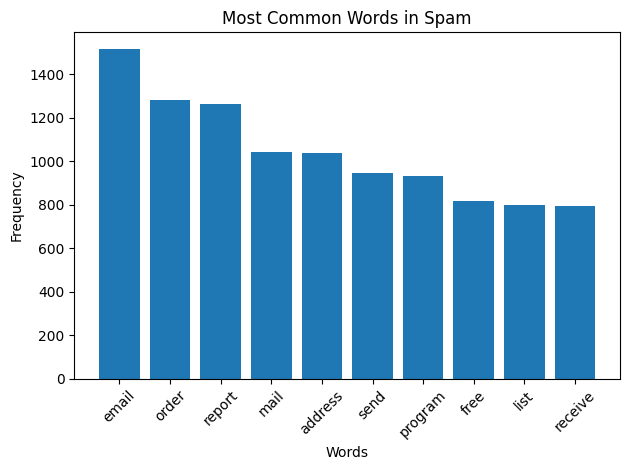

In [26]:
s_words, s_counts = zip(*spam_counter.most_common(10))
plt.bar(s_words, s_counts)
plt.title('Most Common Words in Spam')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

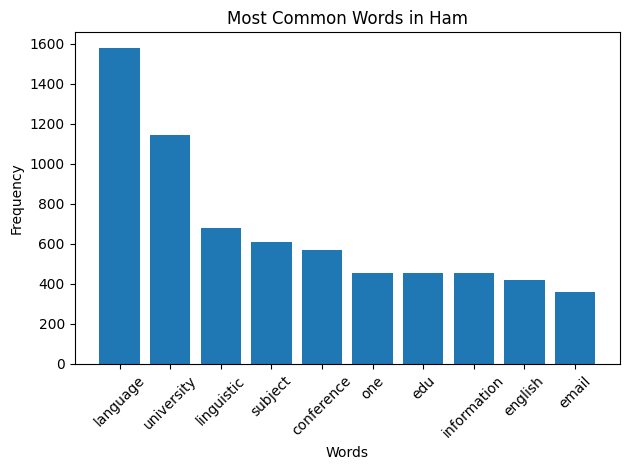

In [27]:
h_words, h_counts = zip(*ham_counter.most_common(10))
plt.bar(h_words, h_counts)
plt.title('Most Common Words in Ham')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [59]:
# frequency of the most common spam/ham words in each message
s_words, _ = zip(*spam_counter.most_common(20))
h_words, _ = zip(*ham_counter.most_common(20))

data["spam_most_common_freq"] = data["clean"].apply(
    lambda x: np.sum([collections.Counter(x)[word.lower()] for word in s_words])
)

data["ham_most_common_freq"] = data["clean"].apply(
    lambda x: np.sum([collections.Counter(x)[word.lower()] for word in h_words])
)

In [66]:
data.head()

,name,text,clean,text_lengths,word_count,is_spam,sub_len,body_len,msg_len,spam_most_common_freq,ham_most_common_freq,stemmed,lemma,punctuation_freq,caps_count,good_email
0,spmsga95.txt,Subject: service update\n\ndue significant rap...,"[subject, service, update, due, significant, r...","[23, 311]",33,1,23,311,334,4,4,"[subject, servic, updat, due, signific, rapid,...","[subject, service, update, due, significant, r...",19,1,0
1,spmsgb16.txt,Subject: season greeting santa !\n\nsanta onli...,"[subject, season, greeting, santa, santa, onli...","[32, 141]",20,1,32,141,173,1,1,"[subject, season, greet, santa, santa, onlinen...","[subject, season, greet, santa, santa, onlinen...",11,1,0
2,spmsga161.txt,Subject: futuresignal\n\nmessage send complian...,"[subject, futuresignal, message, send, complia...","[21, 1765]",170,1,21,1765,1786,22,13,"[subject, futuresign, messag, send, complianc,...","[subject, futuresignal, message, send, complia...",207,1,0
3,spmsgc135.txt,Subject: did work ? - calsvxtn\n\nhello thank ...,"[subject, work, calsvxtn, hello, thank, stop, ...","[30, 133]",22,1,30,133,163,4,1,"[subject, work, calsvxtn, hello, thank, stop, ...","[subject, work, calsvxtn, hello, thank, stop, ...",9,1,0
4,spmsga130.txt,Subject: zero down internet opportunity !\n\n$...,"[subject, zero, internet, opportunity, interne...","[41, 152]",20,1,41,152,193,3,1,"[subject, zero, internet, opportun, internet, ...","[subject, zero, internet, opportunity, interne...",13,1,0


In [41]:
# https://www.geeksforgeeks.org/nlp/porter-stemmer-technique-in-natural-language-processing/
# i double checked this just uses math no pretrained model
# stemming is basically getting the root of the word
import nltk
from nltk.stem import PorterStemmer

porter_stemmer = PorterStemmer()

data["stemmed"] = data["clean"].apply(
    lambda x: [porter_stemmer.stem(word) for word in x]
)

In [45]:
# https://www.geeksforgeeks.org/machine-learning/python-lemmatization-approaches-with-examples/
# i also checked this one idt its a pretrained model
# lemminiation gives a similar effect to stemming, but should product a little less noise and real words
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/jupyter-251201/nltk_data...


In [46]:
lemmatizer = WordNetLemmatizer()

data["lemma"] = data["clean"].apply(
    lambda x: [lemmatizer.lemmatize(word, pos='v') for word in x]
)

In [54]:
# https://www.geeksforgeeks.org/nlp/vectorization-techniques-in-nlp/
# word vecotirzation using Term Frequency-Inverse Document Frequency (TF-IDF)
# basically weighs words based on frequency 
from sklearn.feature_extraction.text import TfidfVectorizer


def identity_tokenizer(text):
    return text

tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False, min_df=2, max_df=0.9, max_features=3000)    
X_tfidf = tfidf.fit_transform(data["lemma"])

print(X_tfidf.toarray())
print(tfidf.get_feature_names_out())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['aa' 'aaa' 'ability' ... 'zip' 'zone' 'zur']


/opt/tljh/user/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/tljh/user/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  warnings.warn(


In [56]:
data.head()

,name,text,clean,text_lengths,word_count,is_spam,sub_len,body_len,msg_len,spam_most_common_freq,ham_most_common_freq,stemmed,lemma
0,spmsga95.txt,Subject: service update\n\ndue significant rap...,"[subject, service, update, due, significant, r...","[23, 311]",33,1,23,311,334,4,4,"[subject, servic, updat, due, signific, rapid,...","[subject, service, update, due, significant, r..."
1,spmsgb16.txt,Subject: season greeting santa !\n\nsanta onli...,"[subject, season, greeting, santa, santa, onli...","[32, 141]",20,1,32,141,173,1,1,"[subject, season, greet, santa, santa, onlinen...","[subject, season, greet, santa, santa, onlinen..."
2,spmsga161.txt,Subject: futuresignal\n\nmessage send complian...,"[subject, futuresignal, message, send, complia...","[21, 1765]",170,1,21,1765,1786,22,13,"[subject, futuresign, messag, send, complianc,...","[subject, futuresignal, message, send, complia..."
3,spmsgc135.txt,Subject: did work ? - calsvxtn\n\nhello thank ...,"[subject, work, calsvxtn, hello, thank, stop, ...","[30, 133]",22,1,30,133,163,4,1,"[subject, work, calsvxtn, hello, thank, stop, ...","[subject, work, calsvxtn, hello, thank, stop, ..."
4,spmsga130.txt,Subject: zero down internet opportunity !\n\n$...,"[subject, zero, internet, opportunity, interne...","[41, 152]",20,1,41,152,193,3,1,"[subject, zero, internet, opportun, internet, ...","[subject, zero, internet, opportunity, interne..."


In [67]:
# check correlation of attributes
correlation_matrix = data.drop(columns=["text", "clean", "text_lengths", "name", "lemma", "stemmed"]).corr()
correlation_matrix = correlation_matrix["is_spam"].sort_values(ascending=False)
print(correlation_matrix)

is_spam                  1.000000
spam_most_common_freq    0.309191
punctuation_freq         0.197564
body_len                 0.064045
msg_len                  0.063484
word_count               0.044305
ham_most_common_freq    -0.100229
sub_len                 -0.117617
good_email              -0.344995
caps_count                    NaN
Name: is_spam, dtype: float64


The attributes that correlate the msot would be the number of common spam words, number of common ham words, punctuation frequency, good email, and the subject length (a little surprising but can be explained by the need to get viewers to click on the email so longer, catchy titles are used)

# 5. Model the data
Using selected ML models, experment with your choices and describe your findings. Finish by selecting a Model to continue with

In [84]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import train_test_split

In [109]:
numeric_features = ["spam_most_common_freq", "punctuation_freq", 
                    "body_len", "ham_most_common_freq", "good_email"]

X_text = data["text"]
X_numeric = data[numeric_features]
y = data["is_spam"].values

X_train_text, X_test_text, X_train_num, X_test_num, y_train, y_test = train_test_split(
    X_text, X_numeric, y, test_size=0.2, random_state=42
)

In [119]:
# scale everything
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num = scaler.transform(X_train_num)
X_test_num = scaler.transform(X_test_num)

In [120]:
# checking weights
print(data["is_spam"].value_counts(normalize=True))

is_spam
0    0.551606
1    0.448394
Name: proportion, dtype: float64


In [121]:
# i think this might work better too sometimes for the multinomial since its expecting frequencies
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack

vectorizer = CountVectorizer(stop_words='english', min_df=2)
X_train_vec = vectorizer.fit_transform(X_train_text)
X_test_vec = vectorizer.transform(X_test_text)

In [122]:
from scipy.sparse import csr_matrix

X_train = hstack([X_train_vec, csr_matrix(X_train_num)])
X_test = hstack([X_test_vec, csr_matrix(X_test_num)])

In [125]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import KFold

# define utility function for getting the stat scores of a model
def return_stats(model):
    global X_train, X_test, y_train, y_test
    
    model.fit(X_train, y_train)

    y_test_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, np.round(y_test_pred))
    print("Test Accuracy:", accuracy)

    print(classification_report(y_test, y_test_pred))

    cv = KFold(n_splits=10)
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    print("CV Accuracy", scores.mean(), "\n")

    feature_names = np.array(vectorizer.get_feature_names_out())
    top_spam_idx = np.argsort(model.feature_log_prob_[1])[-20:]
    top_ham_idx = np.argsort(model.feature_log_prob_[0])[-20:]
    
    print("Top spam features:", feature_names[top_spam_idx])
    print("Top ham features:", feature_names[top_ham_idx])

In [126]:
# https://www.geeksforgeeks.org/machine-learning/naive-bayes-classifiers/
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
return_stats(mnb)

Test Accuracy: 0.9828571428571429
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        94
           1       0.99      0.98      0.98        81

    accuracy                           0.98       175
   macro avg       0.98      0.98      0.98       175
weighted avg       0.98      0.98      0.98       175

CV Accuracy 0.988488612836439 

Top spam features: ['subject' 'http' 'day' 'internet' 'com' 'work' '3d' 'business' 'list'
 'receive' 'free' 'money' 'email' 'program' 'send' 'address' 'order'
 'report' '20' 'mail']
Top ham features: ['papers' '1998' 'include' 'follow' 'fax' 'word' 'form' 'address' '10'
 'mail' 'paper' '30' 'information' 'english' 'conference' 'edu' 'subject'
 'linguistic' 'university' 'language']


I'm not sure I can get much better than this!

# 6. Fine Tune the Model

With the select model descibe the steps taken to acheve the best rusults possiable 


In [130]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'alpha': np.logspace(-3, 1, 50),
    'fit_prior': [True, False]
}

rand_mnb = RandomizedSearchCV(
    estimator=MultinomialNB(),
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

rand_mnb.fit(X_train, y_train)
print("Best params:", rand_mnb.best_params_)
print("Best CV Score for random for mnb:", rand_mnb.best_score_)
best_mnb = rand_mnb.best_estimator_

Best params: {'fit_prior': False, 'alpha': np.float64(0.03556480306223128)}
Best CV Score for random for mnb: 0.9902694887636343


In [132]:
import joblib

# dump models
joblib.dump(mnb, './models/base_mnb.pkl')
joblib.dump(best_mnb, './models/best_mnb.pkl')

['./models/best_mnb.pkl']

# 7. Present
In a customer faceing Document provide summery of finding and detail approach taken


# 8. Launch the Model System
Define your production run code, This should be self susficent and require only your model pramaters 
